# Linear Regression with Scikit Learn

*Adapted from https://github.com/justmarkham*

### Libraries

- [scikit-learn](http://scikit-learn.org/stable/)
- pandas
- matplotlib

In this tutorial we will see some basic examples of Linear Regression for regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Regression with Linear Regression

|     *            | continuous     | categorical    |
| ---------------- | -------------- | -------------- |
| **supervised**   | **regression** | classification |
| **unsupervised** | dim. reduction | clustering     |

### Motivation

Why are we learning Linear Regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- (in some cases) highly interpretable
- basis for many other methods

# Predicting sales from ads expense

Let's import the dataset _Advertising.csv_:

In [13]:
data = pd.read_csv("data/Advertising.csv", sep=',', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of units)

Print the number of rows and columns of the DataFrame

In [7]:
# add your code here
data.shape

(200, 5)

Visualize the relationship between the features and the response using scatterplots. This will allow us to make an initial assesment about the feasibility of our task.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

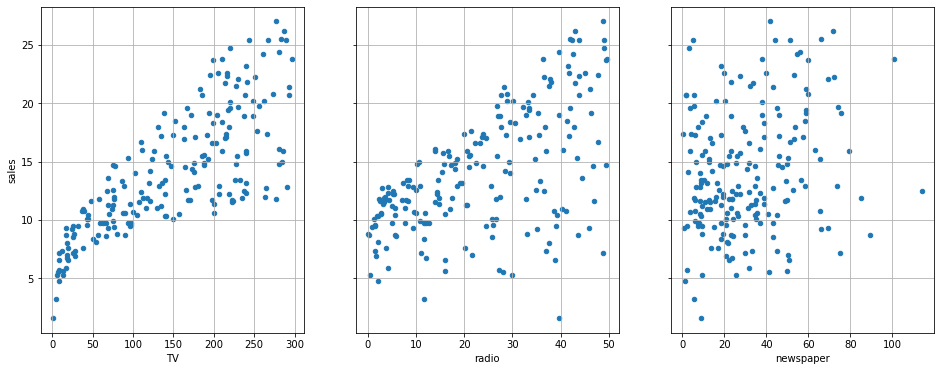

In [10]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 6), grid=True)
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1], grid=True)
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], grid=True)

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="./img/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction:

<img src="./img/slope_intercept.png">

## Hands on!
Let's create the feature matrix and the class vector (X and y):

In [14]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


**Scikit-learn** provides an easy way to train the model, via the `LinearRegression` interface.

Create a linear regression model and train it using X and y.

Check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html for detailed information.

In [19]:
# Create the model
lin_reg = LinearRegression() 

# Train it
lin_reg.fit(X, y)

LinearRegression()

Back to the theory! Let's see what the formula looks like:

In [20]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)

0.04576464545539766 * TV + 
0.18853001691820448 * radio + 
-0.0010374930424762174 * newspaper + 
2.9388893694594014




$$y = \beta_0 + \beta_1  \times TV + \beta_2  \times radio + \beta_3  \times newspaper$$
$$y = 2.938 + 0.045 \times TV + 0.18  \times radio + -0.001  \times newspaper$$

Create a new linear regression model and compute a 5-fold cross-validated prediction of the sales. For this purpose, use the `cross_val_predict` implementation provided by `sklearn` and already imported above. `cross_val_predict` returns an array of the same size as `y` where each entry is a prediction obtained by cross validation. Check out the reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

More on cross validation
https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [42]:
lr = LinearRegression()
predicted = cross_val_predict(lr, X, y)

Let's plot the predictions and the original values:

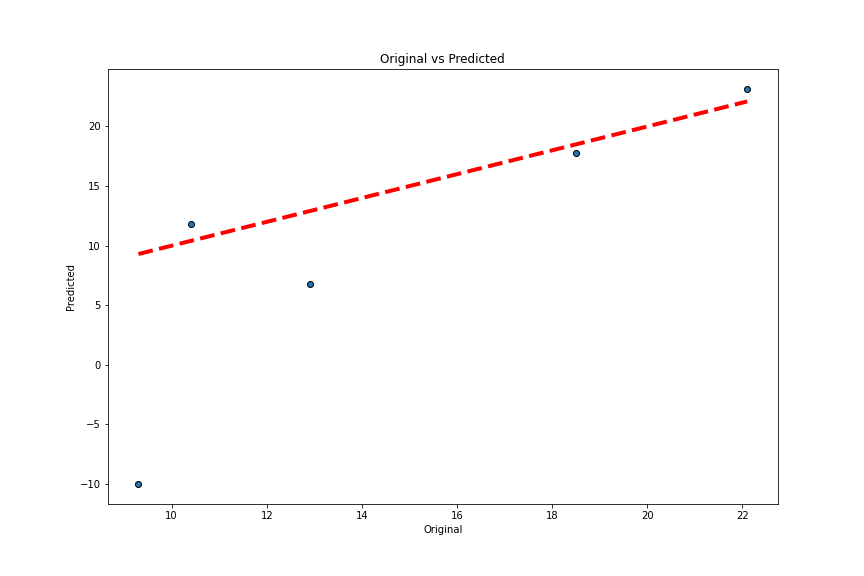

<Figure size 864x576 with 0 Axes>

In [43]:
# code to plot the results
plt.figure(figsize=(12, 8))
plt.scatter(y, predicted, edgecolors=(0, 0, 0))
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
plt.title('Original vs Predicted')
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()

Print the MSE. For this, use the `mean_squared_error` implementation provided by `sklearn` and already imported above.

In [31]:
# add your code here
mean_squared_error(y, predicted)

3.0729465971002115

## Regularization

In our dataset, we have only 3 features, but 200 records, which is enough for learning a good linear model. But what if we had much fewer records, say, 5?

Take the first 5 records from the dataset. In the following we will work with this subset of the data.

In [32]:
X = X[:5]
y = y[:5]

Create a new linear regression model and compute a 5-fold cross-validated prediction of the sales.

In [44]:
lr = LinearRegression()
predicted = cross_val_predict(lr, X, y, cv=5)

Plot the results. You can reuse the code from the previous visualization!

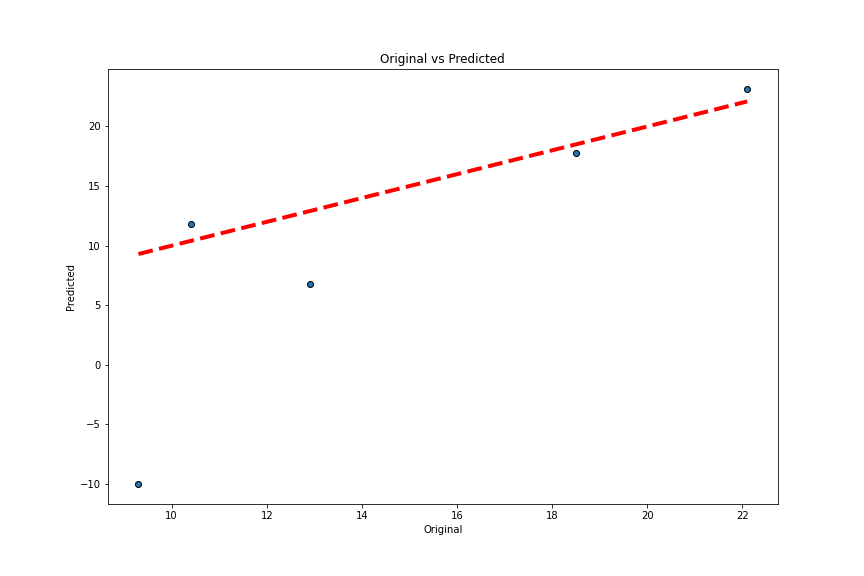

<Figure size 864x576 with 0 Axes>

In [45]:
# code to plot the results
plt.figure(figsize=(12, 8))
plt.scatter(y, predicted, edgecolors=(0, 0, 0))
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
plt.title('Original vs Predicted')
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()

Print the MSE

In [34]:
# add your code here
mean_squared_error(y, predicted)

82.77419262404138

The MSE is very high, because with only 5 examples we do not have enough information to generalize well for newly fresh data.

Now, create a new linear regression model and train it using these 5 records. After this, compute predictions of the same 5 records (_hint:_ use the `predict` function by `sklearn`) and compute the mean squared error.

In [36]:
# Create a linear regression model
lr = LinearRegression()

# Train it
lr.fit(X,y)

# Make predictions
predicted = lr.predict(X)

# Print the MSE
mean_squared_error(y, predicted)

0.05636428314127075

**Problem**: The model remembers the training records (overfitting).

**Solution**: Regularization

Regularization refers to methods that help to reduce overfitting. Let's try Ridge Regression, which puts a penalty on large weights $\beta_i$ and forces them to be smaller in magnitude. This reduces the complexity of the model.

Create a new Ridge linear regression model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and compute a 5-fold cross-validated prediction of the sales.

In [46]:
ridge = Ridge(alpha=6)
predicted_r = cross_val_predict(ridge, X, y, cv=5)


Plot the results. You can reuse the code from the previous visualization!

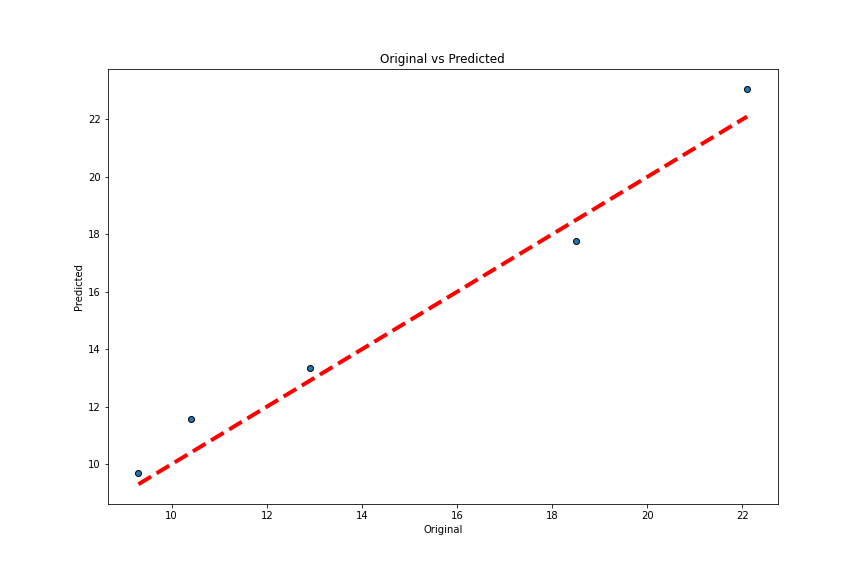

<Figure size 864x576 with 0 Axes>

In [47]:
# code to plot the results
plt.figure(figsize=(12, 8))
plt.scatter(y, predicted_r, edgecolors=(0, 0, 0))
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
plt.title('Original vs Predicted')
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()

Print the MSE

In [48]:
# add your code here
mean_squared_error(y, predicted_r)

0.6442462580572381

The MSE error is much lower, than before (~82.77) because we have not allowed the model to overfit the training data!